In [1]:
!pip install perfplot

Output()

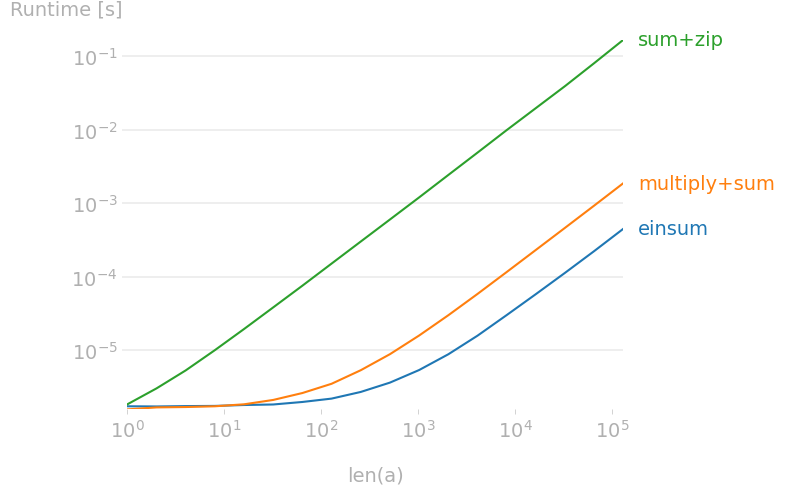

In [5]:
import numpy
import perfplot

perfplot.show(
    setup=lambda n: [numpy.random.rand(n, 3), numpy.random.rand(n, 3)] ,
    kernels=[
        lambda data: numpy.einsum("ij, ij->i", data[0], data[1]),
        lambda data: numpy.multiply(data[0], data[1]).sum(1),
        lambda data: [
            sum(ai * bi for ai, bi in zip(a, b)) for a, b in zip(data[0], data[1])
        ],
    ],
    labels=["einsum", "multiply+sum", "sum+zip"],
    n_range=[2 ** k for k in range(18)],
    xlabel="len(a)",
)



Output()

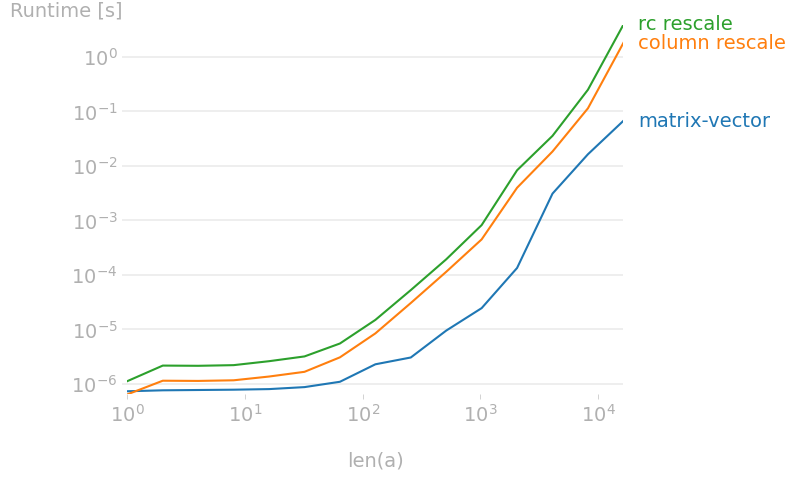

In [30]:
import numpy
import perfplot

perfplot.show(
    setup=lambda n: [numpy.random.rand(n, n), numpy.random.rand(n), numpy.random.rand(n, n)] ,
    kernels=[
        lambda data: numpy.dot( data[0], data[1]),
        #lambda data: numpy.dot( data[0], data[2]),
        lambda data: data[0]*(data[1][:,None]),
        lambda data: (data[1][None,:])*data[0]*(data[1][:,None]),
    ],
    labels=["matrix-vector", "column rescale", "rc rescale"],
    n_range=[2 ** k for k in range(15)],
    xlabel="len(a)",
    equality_check=False,
)